In [145]:
import numpy as np 
import pandas as pd 
from keras import layers ,optimizers
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
import keras
from sklearn.model_selection import train_test_split
from keras.layers import * #Dense,Conv2D, MaxPooling2D, Flatten, InputLayer,Activation ,Dropout,BatchNormalization
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg
import os
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from keras.applications.vgg16 import VGG16 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
import sqlite3 as sql

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1)
callbacks = [EarlyStopping(patience=2, monitor='val_loss', mode='min')]


## Read data from SQL

In [146]:
connection= sql.connect('cleaned_data.db')
file_ = pd.read_sql('SELECT * FROM cleaned_data', connection)

In [150]:
file_.drop(columns='index', inplace=True)

In [151]:
file_

,age,gender,race,file
0,9.0,female,asian,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
1,36.0,male,black,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
2,86.0,female,white,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
3,26.0,female,white,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
4,1.0,female,asian,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
...,...,...,...,...
23700,35.0,male,white,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
23701,52.0,male,indian,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
23702,26.0,male,black,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...
23703,28.0,male,black,/Users/eman./Desktop/BootCamp/DeepLearning/UTK...


In [16]:
path= 'UTKFace'

In [17]:
os.chdir(path)
file_list = os.listdir() #Go path and list files

In [18]:
file_list

['9_1_2_20161219204347420.jpg.chip.jpg',
 '36_0_1_20170117163203851.jpg.chip.jpg',
 '86_1_0_20170120225751953.jpg.chip.jpg',
 '26_1_0_20170116171048641.jpg.chip.jpg',
 '1_1_2_20161219154612988.jpg.chip.jpg',
 '52_0_1_20170117161018159.jpg.chip.jpg',
 '25_1_0_20170117134403373.jpg.chip.jpg',
 '16_0_0_20170104003740977.jpg.chip.jpg',
 '27_0_3_20170119210058457.jpg.chip.jpg',
 '36_0_3_20170119180245724.jpg.chip.jpg',
 '58_0_2_20170116193704928.jpg.chip.jpg',
 '6_1_0_20170114024512634.jpg.chip.jpg',
 '35_1_2_20170116185947151.jpg.chip.jpg',
 '1_1_3_20161219230734016.jpg.chip.jpg',
 '26_1_1_20170103181931657.jpg.chip.jpg',
 '2_0_2_20161219141650121.jpg.chip.jpg',
 '53_1_0_20170110143534851.jpg.chip.jpg',
 '35_0_3_20170119201304861.jpg.chip.jpg',
 '23_1_0_20170117142807780.jpg.chip.jpg',
 '24_0_3_20170119152239904.jpg.chip.jpg',
 '26_1_2_20170116182434267.jpg.chip.jpg',
 '75_0_0_20170117204739711.jpg.chip.jpg',
 '36_1_4_20170104172843788.jpg.chip.jpg',
 '23_1_0_20170116222839270.jpg.chip.jpg

In [152]:
print("Number of images: ", len(file_list))

Number of images:  23709


## extract the ages and categorize it

In [218]:
## Age
age = []
for i in file_list:
    try:
        if int(i.split("_")[0])<=10:
            age.append(0)
        elif int(i.split("_")[0])> 10 and int(i.split("_")[0]) <=15:
            age.append(1)
        elif int(i.split("_")[0])> 15 and int(i.split("_")[0]) <=25:
            age.append(2)
        elif int(i.split("_")[0])> 25 and int(i.split("_")[0]) <=35:
            age.append(3)
        elif int(i.split("_")[0])> 35 and int(i.split("_")[0]) <=45:
            age.append(4)
        elif int(i.split("_")[0])> 45 and int(i.split("_")[0]) <=55:
            age.append(5)
        elif int(i.split("_")[0])> 55 and int(i.split("_")[0]) <=65:
            age.append(6)
        else:
            age.append(7)
    except:
        pass
    
age_labels = ['(0-10)', '(11-15)', '(16-25)', '(26-35)', '(36-45)', '(46- 55)', '(56-65)', '(>60)']

age = np.array(age)

print(age.shape)


(23708,)


## Extract Gender

In [106]:
## Gender
gender=[]
for i in file_list:
    try:
        if int(i.split("_")[1])==0:
            gender.append(0)
        elif int(i.split("_")[1])==1:
            gender.append(1)
    except:
        pass
        
gender_labels = ["male","female"]
gender = np.array(gender)
print(gender.shape)

(23708,)


## Extract images

In [84]:
image=[]
for file in file_list:
    try:
        img= cv2.imread(file)
        img=cv2.resize(img,dsize = (128,128)) # (200,200)--->(48,48)
        img=cv2.cvtColor((img), cv2.COLOR_BGR2RGB)
        image.append(img)
    except:
        pass
image= np.array(image)
print("images shape: ",image.shape)

images shape:  (23708, 128, 128, 3)


In [23]:
image=shuffle(image)

## Display 5 images as a sample

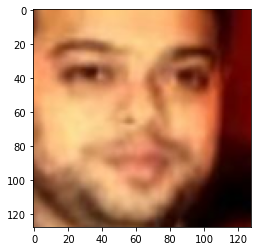

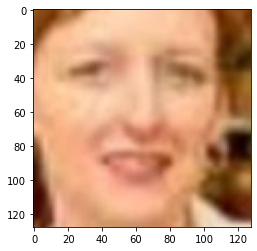

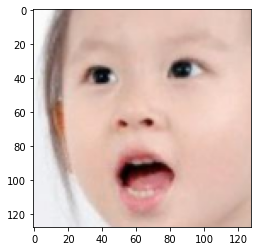

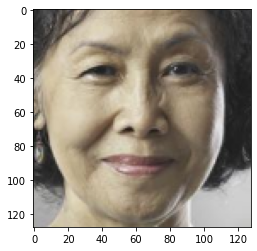

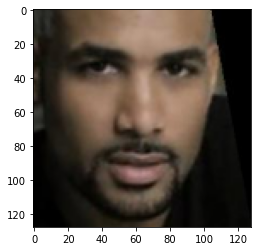

In [24]:
for i in range(5):
    plt.imshow(image[i+10])
    plt.show()

## Normalization the images

In [25]:
#normalization # pixel scaling
image=np.array(image)/255.0

In [26]:
image.shape

(23708, 128, 128, 3)

## Split Data

In [183]:
x=image
y=age

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,shuffle=True, random_state=42)
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train , test_size = 0.2 ,shuffle=True, random_state= 42)

## Reshape the data to fit into LR and simple NN models

In [162]:
sample,x,y,dim=x_train.shape
x_train_re=x_train.reshape(sample, x*y*dim)


In [163]:
sample,x,y,dim=x_val.shape
x_val_re=x_val.reshape(sample, x*y*dim)


In [164]:
print("x_train shape:",x_train_re.shape)
print("x_val shape:",x_val_re.shape)

#one hot encoding
y_train= to_categorical(y_train,num_classes=8)
y_val= to_categorical(y_val,num_classes=8) 


print("y_train shape: ",y_train.shape)
print("y_val shape: ",y_val.shape)


x_train shape: (11379, 49152)
x_val shape: (2845, 49152)
y_train shape:  (11379, 8)
y_val shape:  (2845, 8)


## Baseline

## Apply Logistic Regression model


**Accuracy Score Calculation Method**

In [208]:
def score(X_train_f, X_val_f, y_train_f, y_val_f):
    models = [LogisticRegression()]
    models_names= ['LogisticRegression']
    i=0
    for model in models:
        mod= OneVsRestClassifier(model).fit(X_train_f, y_train_f)
        t_score=mod.score(X_train_f, y_train_f)
        v_score=mod.score(X_val_f, y_val_f)
        print('Training accuracy score in {0} {1:.3f}'.format(models_names[i],t_score))
        print('Validation accuracy score in {0} {1:.3f}'.format(models_names[i],v_score))
        print()
    

In [209]:
score(x_train_re, x_val_re, y_train, y_val)

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eman./opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Training accuracy score in LogisticRegression 0.687
Validation accuracy score in LogisticRegression 0.479



## Apply Simple Neural Network model (NN)

In [165]:
simple_model = Sequential()
simple_model.add(Dense(200, input_shape = x_train_re.shape[1:])),
simple_model.add(Dense(100,activation='tanh')),
simple_model.add(Dense(80,activation='relu')),
simple_model.add(Dense(8,activation='softmax')),

simple_model.summary()

simple_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 200)               9830600   
                                                                 
 dense_81 (Dense)            (None, 100)               20100     
                                                                 
 dense_82 (Dense)            (None, 80)                8080      
                                                                 
 dense_83 (Dense)            (None, 8)                 648       
                                                                 
Total params: 9,859,428
Trainable params: 9,859,428
Non-trainable params: 0
_________________________________________________________________


In [169]:
simple_model.fit(x_train_re, y_train,
                 validation_data=(x_val_re, y_val),
                 epochs=30,
                 callbacks=[early_stopping])

Epoch 1/30
356/356 [==============================] - 6s 17ms/step - loss: 1.8802 - accuracy: 0.3231 - val_loss: 1.9114 - val_accuracy: 0.3040
Epoch 2/30
356/356 [==============================] - 6s 17ms/step - loss: 1.8806 - accuracy: 0.3231 - val_loss: 1.8959 - val_accuracy: 0.3040


In [190]:
predict_x2=np.argmax(y_train,axis=1)
classes_x2 = np.argmax(simple_model.predict(x_train_re),axis=1)
print('train accuracy: ')
print(accuracy_score(predict_x2, classes_x2))


predict_x3=np.argmax(y_val,axis=1)
classes_x3 = np.argmax(simple_model.predict(x_val_re),axis=1)
print("\n")
print('val accuracy: ')
print(accuracy_score(predict_x3, classes_x3))

train accuracy: 
0.3230512347306442


val accuracy: 
0.30404217926186294


## Apply Convolutional Neural Networks (CNN)

**Prepare the data to fit into model**

In [185]:
print("x_train shape:",x_train.shape)
print("x_val shape:",x_val.shape)

#one hot encoding
y_train= to_categorical(y_train,num_classes=8)
y_val= to_categorical(y_val,num_classes=8) 


print("y_train shape: ",y_train.shape)
print("y_val shape: ",y_val.shape)


x_train shape: (11379, 128, 128, 3)
x_val shape: (2845, 128, 128, 3)
y_train shape:  (11379, 8)
y_val shape:  (2845, 8)


### First attempt

**Here we used "tanh" in activation funcation**

In [186]:
CNN = Sequential()
CNN.add(Conv2D(100, kernel_size = 3, activation = 'tanh', input_shape = (128,128,3)))
CNN.add(Conv2D(filters=64,kernel_size=3, activation='tanh', padding='same')),
#CNN.add(MaxPooling2D()),
regularizer =keras.regularizers.l2(l=0.0005)

CNN.add(MaxPooling2D()),
CNN.add(Dropout(0.2)),

CNN.add(Flatten()),
CNN.add(Dense(80,activation='tanh')),
CNN.add(Dense(64,activation='tanh')),

CNN.add(Dense(8,activation='softmax'))


CNN.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])
CNN.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 126, 126, 100)     2800      
                                                                 
 conv2d_80 (Conv2D)          (None, 126, 126, 64)      57664     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 dropout_64 (Dropout)        (None, 63, 63, 64)        0         
                                                                 
 flatten_30 (Flatten)        (None, 254016)            0         
                                                                 
 dense_93 (Dense)            (None, 80)                20321360  
                                                     

In [188]:
CNN.fit(x_train, y_train, epochs=30, batch_size=512,verbose=1,validation_data=(x_val,y_val),callbacks=[early_stopping])

Epoch 1/30
23/23 [==============================] - 388s 17s/step - loss: 2.1008 - accuracy: 0.3231 - val_loss: 1.9908 - val_accuracy: 0.3040
Epoch 2/30
23/23 [==============================] - 388s 17s/step - loss: 1.9382 - accuracy: 0.3231 - val_loss: 1.9183 - val_accuracy: 0.3040


In [189]:
predict_x2=np.argmax(y_train,axis=1)
classes_x2 = np.argmax(CNN.predict(x_train),axis=1)
print('train accuracy: ')
print(accuracy_score(predict_x2, classes_x2))


predict_x3=np.argmax(y_val,axis=1)
classes_x3 = np.argmax(CNN.predict(x_val),axis=1)
print("\n")
print('val accuracy: ')
print(accuracy_score(predict_x3, classes_x3))

train accuracy: 
0.3230512347306442


val accuracy: 
0.30404217926186294


### Second attempt to optimize the model

**Here we used "relu" in activation funcation**

In [192]:
CNN = Sequential()
CNN.add(Conv2D(64, kernel_size = 3, input_shape = (128,128,3)))
CNN.add(Conv2D(filters=48,kernel_size=3, activation='relu', padding='same')),
CNN.add(BatchNormalization())

CNN.add(Conv2D(filters=16,kernel_size=3, activation='relu', padding='same')),
CNN.add(MaxPooling2D()),
CNN.add(BatchNormalization())

CNN.add(Flatten()),
CNN.add(Dense(60,activation='relu')),
CNN.add(Dense(40,activation='relu')),
CNN.add(Dropout(0.2))
CNN.add(Dense(40,activation='relu')),
CNN.add(Dense(30,activation='relu')),

CNN.add(Dense(8,activation='softmax'))


CNN.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])

CNN.fit(x_train, y_train, epochs=10, verbose=1,validation_data=(x_val,y_val) ,callbacks=[early_stopping],shuffle=True)

Epoch 1/10
356/356 [==============================] - 349s 978ms/step - loss: 1.6592 - accuracy: 0.3849 - val_loss: 1.7733 - val_accuracy: 0.3596
Epoch 2/10
356/356 [==============================] - 340s 955ms/step - loss: 1.3759 - accuracy: 0.4639 - val_loss: 1.6492 - val_accuracy: 0.3603
Epoch 3/10
356/356 [==============================] - 337s 945ms/step - loss: 1.2231 - accuracy: 0.5050 - val_loss: 1.4706 - val_accuracy: 0.4144
Epoch 4/10
356/356 [==============================] - 336s 943ms/step - loss: 1.1297 - accuracy: 0.5370 - val_loss: 1.3337 - val_accuracy: 0.4749
Epoch 5/10
356/356 [==============================] - 334s 938ms/step - loss: 1.0371 - accuracy: 0.5674 - val_loss: 1.4683 - val_accuracy: 0.4612


In [193]:
predict_x2=np.argmax(y_train,axis=1)
classes_x2 = np.argmax(CNN.predict(x_train),axis=1)
print('train accuracy: ')
print(accuracy_score(predict_x2, classes_x2))


predict_x3=np.argmax(y_val,axis=1)
classes_x3 = np.argmax(CNN.predict(x_val),axis=1)
print("\n")
print('val accuracy: ')
print(accuracy_score(predict_x3, classes_x3))

train accuracy: 
0.5358115827401353


val accuracy: 
0.4611599297012302


**We choose this model that give us best accuracy in validation**. So, we will apply test on this model

In [221]:
predict_x = CNN.predict(x_test)
classes_x = np.argmax(predict_x, axis=1)
print("Test accuracy: ")
print(accuracy_score(y_test, classes_x))

Test accuracy: 
0.3652467313369886


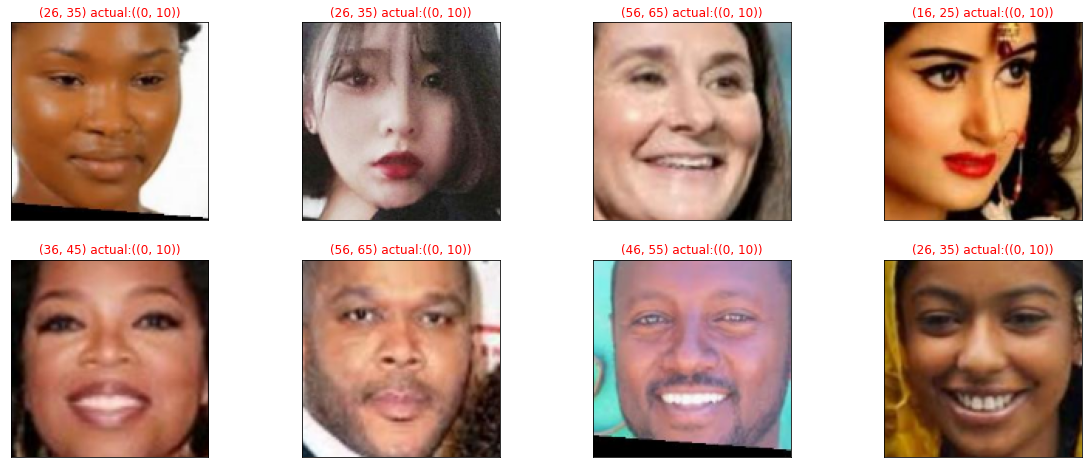

In [231]:
predictions = CNN.predict(x_test)

# Plot a random sample of 8 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=8, replace=False)):
    ax = figure.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(predictions[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} actual:({})".format(age_labels[predict_index], 
                                  age_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

### Third attempt

In [ ]:
## optimize the model

In [199]:
CNN = Sequential()
CNN.add(Conv2D(300, kernel_size = 3, input_shape = (128,128,3)))
CNN.add(Conv2D(filters=48,kernel_size=3, activation='relu', padding='same')),
CNN.add(BatchNormalization())
CNN.add(Dropout(0.1))

CNN.add(Conv2D(filters=16,kernel_size=3, activation='relu', padding='same')),
CNN.add(MaxPooling2D()),
CNN.add(BatchNormalization())

CNN.add(Flatten()),
CNN.add(Dense(160,activation='relu')),
CNN.add(Dense(40,activation='relu')),
CNN.add(Dropout(0.1))
CNN.add(Dense(30,activation='relu')),

CNN.add(Dense(8,activation='softmax'))


CNN.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])

CNN.fit(x_train, y_train, epochs=10, verbose=1,validation_data=(x_val,y_val) ,callbacks=[early_stopping],shuffle=True)

Epoch 1/10
356/356 [==============================] - 1034s 3s/step - loss: 1.5966 - accuracy: 0.3976 - val_loss: 1.4607 - val_accuracy: 0.4309
Epoch 2/10
356/356 [==============================] - 1033s 3s/step - loss: 1.3214 - accuracy: 0.4840 - val_loss: 1.6874 - val_accuracy: 0.3649


In [201]:
predict_x2=np.argmax(y_train,axis=1)
classes_x2 = np.argmax(CNN.predict(x_train),axis=1)
print('train accuracy: ')
print(accuracy_score(predict_x2, classes_x2))


predict_x3=np.argmax(y_val,axis=1)
classes_x3 = np.argmax(CNN.predict(x_val),axis=1)
print("\n")
print('val accuracy: ')
print(accuracy_score(predict_x3, classes_x3))

train accuracy: 
0.3912470340100185


val accuracy: 
0.3648506151142355


### Fourth attempt

In [202]:
activation='tanh'
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2,input_shape=(128,128,3), activation=activation,))
model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(filters=64, kernel_size=3,input_shape=(128,128,3), activation=activation,))
model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(filters=64, kernel_size=2,input_shape=(128,128,3), activation=activation,))
model.add(MaxPooling2D(pool_size=3))

# model.add(Conv2D(filters=32, kernel_size=3,input_shape=(128,128,3), activation=activation,))
# model.add(MaxPooling2D(pool_size=2))

# flatten array to 128*128
model.add(Flatten())
model.add(Dense(512))
model.add(Activation(activation))


# Prevent overfitting 
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation(activation))



model.add(Dense(8))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [203]:
model.fit(x_train, y_train, epochs=10, verbose=1,validation_data=(x_val,y_val) ,callbacks=[callbacks])

Epoch 1/10
356/356 [==============================] - 73s 203ms/step - loss: 1.9309 - accuracy: 0.3108 - val_loss: 1.9210 - val_accuracy: 0.3040
Epoch 2/10
356/356 [==============================] - 73s 204ms/step - loss: 1.8953 - accuracy: 0.3230 - val_loss: 1.9221 - val_accuracy: 0.3040
Epoch 3/10
356/356 [==============================] - 73s 204ms/step - loss: 1.9013 - accuracy: 0.3206 - val_loss: 1.9182 - val_accuracy: 0.3040
Epoch 4/10
356/356 [==============================] - 74s 207ms/step - loss: 1.9027 - accuracy: 0.3202 - val_loss: 1.9256 - val_accuracy: 0.3040
Epoch 5/10
356/356 [==============================] - 74s 208ms/step - loss: 1.9008 - accuracy: 0.3231 - val_loss: 1.9149 - val_accuracy: 0.3040
Epoch 6/10
356/356 [==============================] - 74s 208ms/step - loss: 1.8964 - accuracy: 0.3210 - val_loss: 1.9158 - val_accuracy: 0.3040
Epoch 7/10
356/356 [==============================] - 74s 208ms/step - loss: 1.8976 - accuracy: 0.3230 - val_loss: 1.9683 - val_ac

In [204]:
predict_x2=np.argmax(y_train,axis=1)
classes_x2 = np.argmax(model.predict(x_train),axis=1)
print('train accuracy: ')
print(accuracy_score(predict_x2, classes_x2))


predict_x3=np.argmax(y_val,axis=1)
classes_x3 = np.argmax(model.predict(x_val),axis=1)
print("\n")
print('val accuracy: ')
print(accuracy_score(predict_x3, classes_x3))

train accuracy: 
0.3230512347306442


val accuracy: 
0.30404217926186294


## Transfer Learning

**1-Transfer learning using CNN with Pre-trained model(VGG16)**

In [205]:
input_shape= x_train.shape[1:]
vgg= VGG16(include_top= False,weights="imagenet",input_shape=input_shape)

In [206]:
model= Sequential() #I create my model

for layer in vgg.layers: 
    model.add(layer)        # I transfer vgg layers to my model

for layer in model.layers:
    layer.trainable= False  #I'll use vgg16 weights so trainable=False

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation="softmax"))
print(model.summary())

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 32, 32, 256)     

In [207]:
model.compile(loss="categorical_crossentropy",optimizer="adam" ,metrics=["accuracy"])
model.fit(x_train, y_train, epochs=20, verbose=1,validation_data=(x_val,y_val) ,callbacks=[early_stopping])

Epoch 1/20
356/356 [==============================] - 491s 1s/step - loss: 2.4586 - accuracy: 0.3301 - val_loss: 1.7891 - val_accuracy: 0.3810
Epoch 2/20
356/356 [==============================] - 472s 1s/step - loss: 1.8207 - accuracy: 0.3912 - val_loss: 1.6237 - val_accuracy: 0.4039
Epoch 3/20
356/356 [==============================] - 461s 1s/step - loss: 1.7023 - accuracy: 0.4035 - val_loss: 1.6123 - val_accuracy: 0.4046


In [208]:
predict_x2=np.argmax(y_train,axis=1)
classes_x2 = np.argmax(model.predict(x_train),axis=1)
print('train accuracy: ')
print(accuracy_score(predict_x2, classes_x2))


predict_x3=np.argmax(y_val,axis=1)
classes_x3 = np.argmax(model.predict(x_val),axis=1)
print("\n")
print('val accuracy: ')
print(accuracy_score(predict_x3, classes_x3))

train accuracy: 
0.4143597855699095


val accuracy: 
0.4045694200351494


In [52]:
# plot_model(model, to_file='model.png')
# img = mpimg.imread('model.png')

# plt.figure(figsize=(35, 30))
# plt.imshow(img)

**2- Transfer learning using CNN with Pre-trained model(mobilenet_v2)**

In [209]:
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.models import Model


base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3)) 
 
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False    

# Establish new fully connected block
x = base_model.output
x = Dense(256, activation='relu')(x)
x= Dropout(0.2)(x)
x= Conv2D(filters=32, kernel_size = 3, activation = 'relu')(x)


x = Flatten()(x) 
x = Dense(200, activation='relu')(x)

output = Dense(8, activation='softmax')(x) 


model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [210]:
h=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs =20 ,batch_size =64 )#,callbacks=[callbacks]

Epoch 1/20
178/178 [==============================] - 66s 358ms/step - loss: 1.7690 - accuracy: 0.3535 - val_loss: 1.6371 - val_accuracy: 0.3926
Epoch 2/20
178/178 [==============================] - 64s 359ms/step - loss: 1.6203 - accuracy: 0.3946 - val_loss: 1.5798 - val_accuracy: 0.4074
Epoch 3/20
178/178 [==============================] - 64s 360ms/step - loss: 1.5599 - accuracy: 0.4182 - val_loss: 1.6663 - val_accuracy: 0.3821
Epoch 4/20
178/178 [==============================] - 65s 366ms/step - loss: 1.5300 - accuracy: 0.4195 - val_loss: 1.5959 - val_accuracy: 0.3877
Epoch 5/20
178/178 [==============================] - 65s 364ms/step - loss: 1.5077 - accuracy: 0.4296 - val_loss: 1.5206 - val_accuracy: 0.4165
Epoch 6/20
178/178 [==============================] - 65s 368ms/step - loss: 1.4764 - accuracy: 0.4406 - val_loss: 1.5590 - val_accuracy: 0.4095
Epoch 7/20
178/178 [==============================] - 65s 366ms/step - loss: 1.4578 - accuracy: 0.4418 - val_loss: 1.5079 - val_ac

In [211]:
predict_x2=np.argmax(y_train,axis=1)
classes_x2 = np.argmax(model.predict(x_train),axis=1)
print('train accuracy: ')
print(accuracy_score(predict_x2, classes_x2))


predict_x3=np.argmax(y_val,axis=1)
classes_x3 = np.argmax(model.predict(x_val),axis=1)
print("\n")
print('val accuracy: ')
print(accuracy_score(predict_x3, classes_x3))

train accuracy: 
0.5873099569382195


val accuracy: 
0.4355008787346221


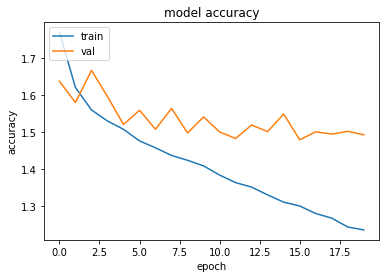

In [213]:
history=h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**3- Transfer learning using CNN with Pre-trained model(efficientnet)**

In [214]:
from tensorflow.keras.applications import efficientnet 

base_model =efficientnet.EfficientNetB0(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(128,128,3), pooling=None, classes=1000,
    classifier_activation='softmax'
)

# Freeze convolutional layers
for layer in base_model.layers[:6]:
    layer.trainable = False    

# Establish new fully connected block

x = base_model.output
x = Dense(512, activation='relu')(x)
#x= Conv2D(filters=32, kernel_size = 3, activation = 'relu')(x)

x = Flatten()(x) 
x = Dense(80, activation='relu')(x)

output = Dense(8, activation='softmax')(x) 


model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [232]:
r=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs =20 ,batch_size =64 )#,callbacks=[callbacks]

Epoch 1/20
178/178 [==============================] - 396s 2s/step - loss: 0.8604 - accuracy: 0.6661 - val_loss: 1.2665 - val_accuracy: 0.5202
Epoch 2/20
178/178 [==============================] - 385s 2s/step - loss: 0.7527 - accuracy: 0.7156 - val_loss: 1.2960 - val_accuracy: 0.4907
Epoch 3/20
178/178 [==============================] - 385s 2s/step - loss: 0.6743 - accuracy: 0.7451 - val_loss: 1.2926 - val_accuracy: 0.5118
Epoch 4/20
178/178 [==============================] - 385s 2s/step - loss: 0.5858 - accuracy: 0.7930 - val_loss: 1.3772 - val_accuracy: 0.4696
Epoch 5/20
178/178 [==============================] - 384s 2s/step - loss: 0.4937 - accuracy: 0.8318 - val_loss: 1.4134 - val_accuracy: 0.4752
Epoch 6/20
178/178 [==============================] - 385s 2s/step - loss: 0.4264 - accuracy: 0.8558 - val_loss: 1.3784 - val_accuracy: 0.5026
Epoch 7/20
178/178 [==============================] - 387s 2s/step - loss: 0.3657 - accuracy: 0.8764 - val_loss: 1.4257 - val_accuracy: 0.5241

In [233]:
predict_x2=np.argmax(y_train,axis=1)
classes_x2 = np.argmax(model.predict(x_train),axis=1)
print('train accuracy: ')
print(accuracy_score(predict_x2, classes_x2))


predict_x3=np.argmax(y_val,axis=1)
classes_x3 = np.argmax(model.predict(x_val),axis=1)
print("\n")
print('val accuracy: ')
print(accuracy_score(predict_x3, classes_x3))

train accuracy: 
0.9965726337991037


val accuracy: 
0.5275922671353251


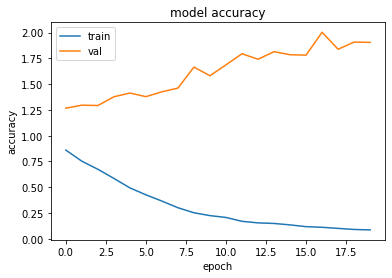

In [234]:
history=r
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Gender Detection Modeling

In [117]:
gender_cat = to_categorical(gender, num_classes=2)
(x_train, y_train), (x_test, y_test) = (image[:10000],gender_cat[:10000]) , (image[10000:] , gender_cat[10000:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])


In [120]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(128,128,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 128, 128, 64)      832       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 dropout_54 (Dropout)        (None, 64, 64, 64)        0         
                                                                 
 conv2d_60 (Conv2D)          (None, 64, 64, 32)        8224      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_55 (Dropout)        (None, 32, 32, 32)      

In [121]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=512,
         validation_data=(x_valid, y_valid),callbacks=[callbacks])

Epoch 1/240
157/157 [==============================] - 96s 603ms/step - loss: 18.5388 - accuracy: 0.5864 - val_loss: 0.6683 - val_accuracy: 0.6271
Epoch 2/240
157/157 [==============================] - 92s 584ms/step - loss: 0.6386 - accuracy: 0.6538 - val_loss: 0.6543 - val_accuracy: 0.6546
Epoch 3/240
157/157 [==============================] - 91s 577ms/step - loss: 0.5969 - accuracy: 0.6889 - val_loss: 0.6231 - val_accuracy: 0.6799
Epoch 4/240
157/157 [==============================] - 91s 579ms/step - loss: 0.5622 - accuracy: 0.7105 - val_loss: 0.5606 - val_accuracy: 0.7250
Epoch 5/240
157/157 [==============================] - 91s 579ms/step - loss: 0.5322 - accuracy: 0.7304 - val_loss: 0.5037 - val_accuracy: 0.7559
Epoch 6/240
157/157 [==============================] - 91s 577ms/step - loss: 0.5095 - accuracy: 0.7524 - val_loss: 0.5517 - val_accuracy: 0.7426
Epoch 7/240
157/157 [==============================] - 91s 583ms/step - loss: 0.4859 - accuracy: 0.7616 - val_loss: 0.4860 

In [123]:
predict_x2=np.argmax(y_train,axis=1)
classes_x2 = np.argmax(model.predict(x_train),axis=1)
print('train accuracy: ')
print(accuracy_score(predict_x2, classes_x2))


predict_x3=np.argmax(y_valid,axis=1)
classes_x3 = np.argmax(model.predict(x_valid),axis=1)
print("\n")
print('val accuracy: ')
print(accuracy_score(predict_x3, classes_x3))

train accuracy: 
0.9134


val accuracy: 
0.8658571428571429


## Testing gender model

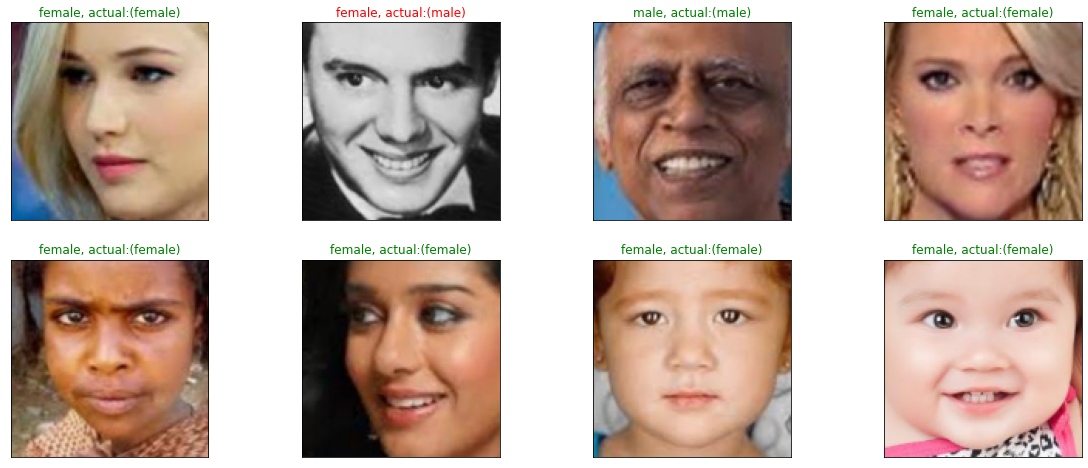

In [126]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=8, replace=False)):
    ax = figure.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{}, actual:({})".format(gender_labels[predict_index], 
                                  gender_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()